## I'm going to predict the car price based on several factors

### Import Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

### View the data

In [29]:
data = pd.read_csv('car_price.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Dealing with missing values

In [30]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [31]:
raw_data = data.drop(['Model', 'Registration'], axis=1)
data_no_mv = raw_data.dropna(axis=0)
data_no_mv.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011


In [32]:
for cols in raw_data:
    print(cols," : ",raw_data[cols].nunique())

Brand  :  7
Price  :  906
Body  :  6
Mileage  :  410
EngineV  :  73
Engine Type  :  4
Year  :  39


## Exploring the PDFs

<Axes: xlabel='Price', ylabel='Density'>

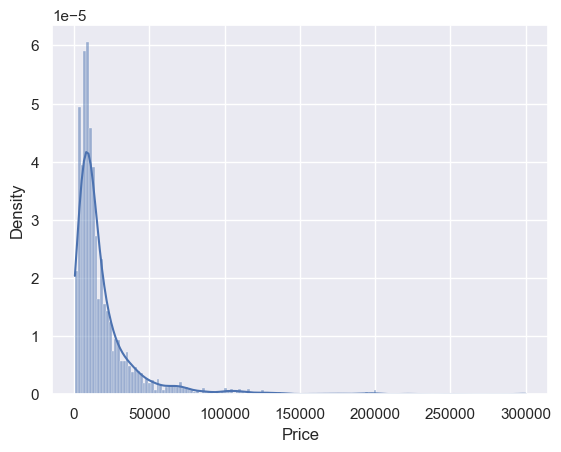

In [33]:
sns.histplot(data_no_mv['Price'], kde=True, stat="density")

## Dealing with outliers

In [34]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,880,NaN,1528,NaN,NaN,1853,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,2011.000000


<Axes: xlabel='Price', ylabel='Count'>

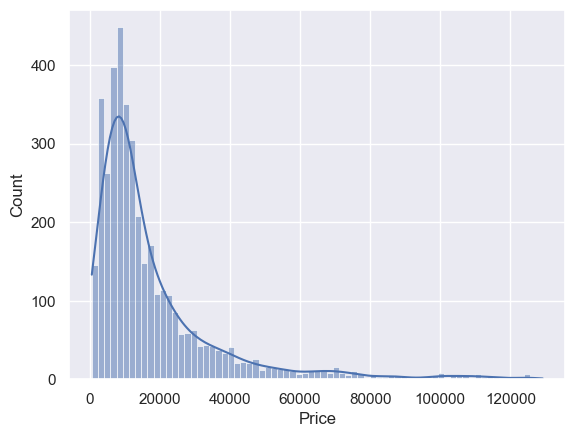

In [35]:
sns.histplot(data_1['Price'], kde = True)

<Axes: xlabel='Mileage', ylabel='Count'>

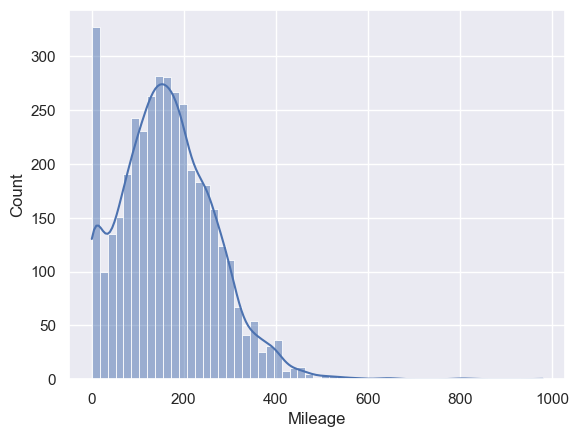

In [36]:
sns.histplot(data_1['Mileage'],kde=True)

<Axes: xlabel='Mileage', ylabel='Count'>

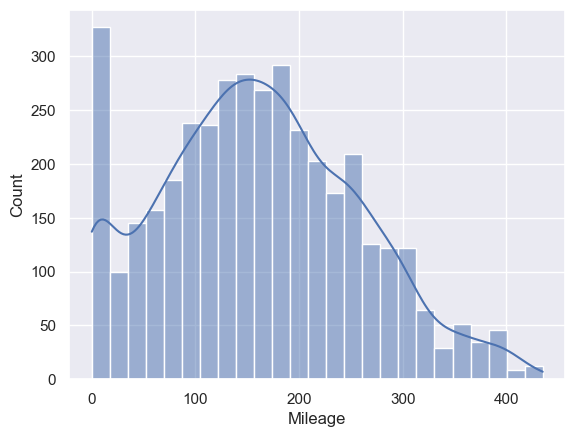

In [37]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

sns.histplot(data_2['Mileage'], kde=True)

<Axes: xlabel='EngineV', ylabel='Count'>

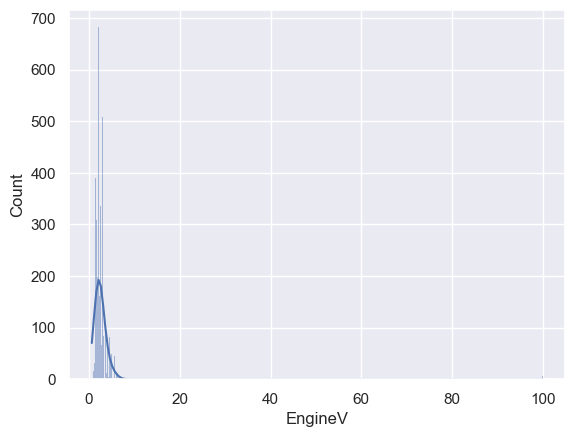

In [38]:
sns.histplot(data_2['EngineV'], kde=True)

<Axes: xlabel='EngineV', ylabel='Count'>

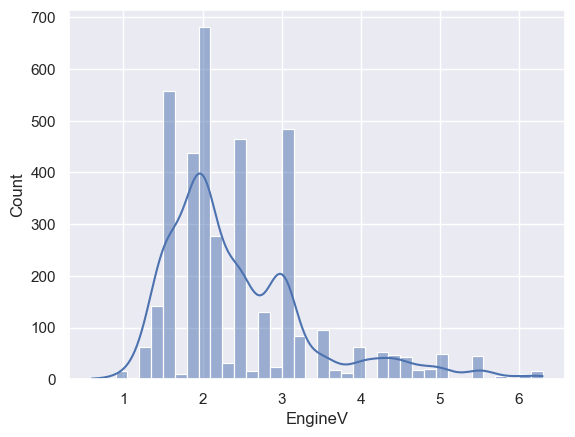

In [39]:
data_3 = data_2[data_2['EngineV']<6.5]

sns.histplot(data_3['EngineV'], kde=True)

<Axes: xlabel='Year', ylabel='Count'>

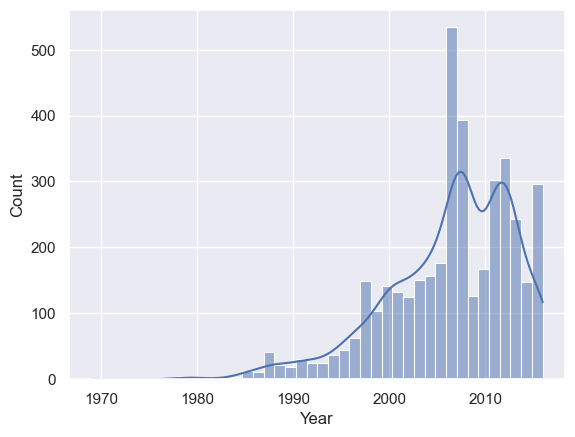

In [41]:
sns.histplot(data_no_mv['Year'], kde = True)

<Axes: xlabel='Year', ylabel='Count'>

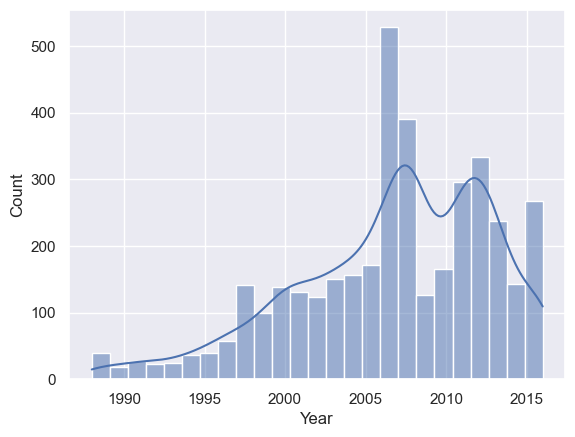

In [42]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

sns.histplot(data_4['Year'], kde=True)

In [43]:
data_cleaned = data_4.reset_index(drop=True)

In [44]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,848,NaN,1467,NaN,NaN,1807,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,2012.000000


## Checking the OLS assumptions

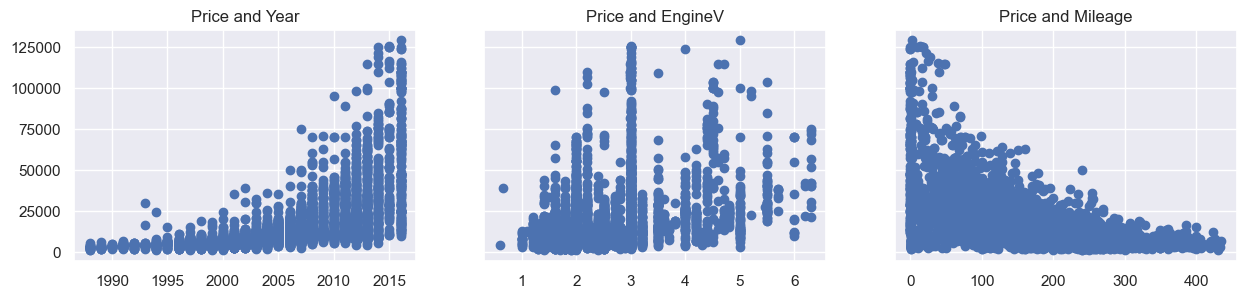

In [46]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

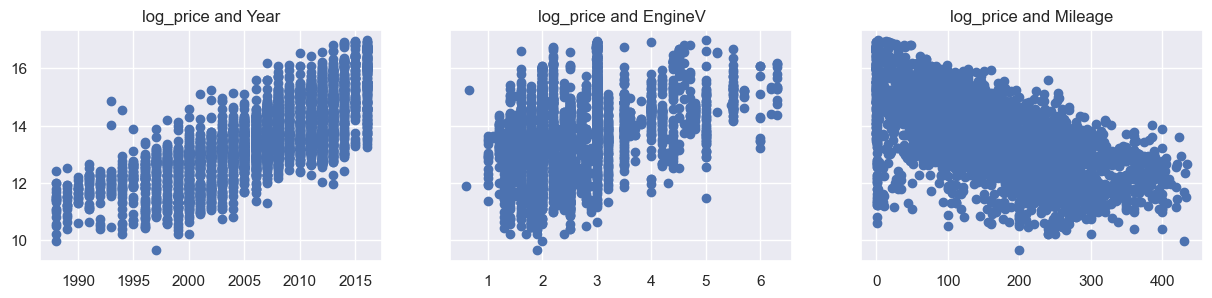

In [48]:
data_cleaned['log_price'] = np.log2(data_cleaned['Price'])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')


plt.show()

In [49]:
data_cleaned = data_cleaned.drop('Price',axis=1)

## Multicollinearity

In [50]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Year',
       'log_price'], dtype=object)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [52]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [53]:
data_no_mc = data_cleaned.drop('Year', axis=1)

## Create dummy variables

In [54]:
data_with_dummies = pd.get_dummies(data_no_mc, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2.0,12.036174,True,False,False,False,False,False,False,False,True,False,False,False,False,True
1,427,2.9,12.947637,False,True,False,False,False,False,False,False,False,False,True,False,False,False
2,358,5.0,13.699139,False,True,False,False,False,False,False,False,True,False,False,True,False,False
3,240,4.2,14.489346,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,120,2.0,14.159556,False,False,False,False,True,False,False,False,False,False,False,False,False,True


In [55]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol'], dtype=object)

In [65]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol']

data_preprocessed = data_with_dummies[cols]
data_preprocessed = data_preprocessed.replace({True:1, False:0})

## Linear Regression Model

### Declare the inputs and targets

In [66]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop('log_price', axis=1)

### Scale the data

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [68]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

### Create the regression

In [72]:
reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [73]:
y_hat = reg.predict(x_train)

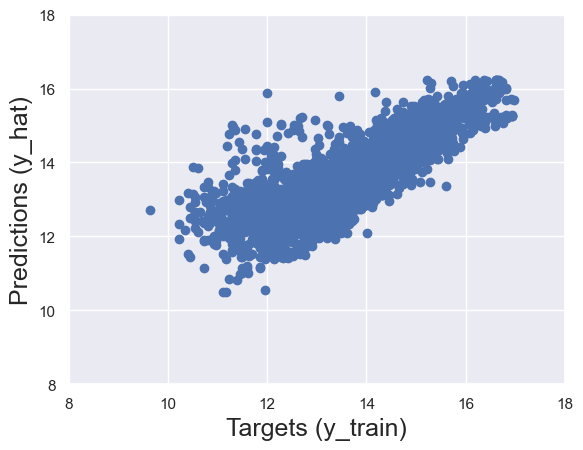

In [84]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(8,18)
plt.ylim(8,18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

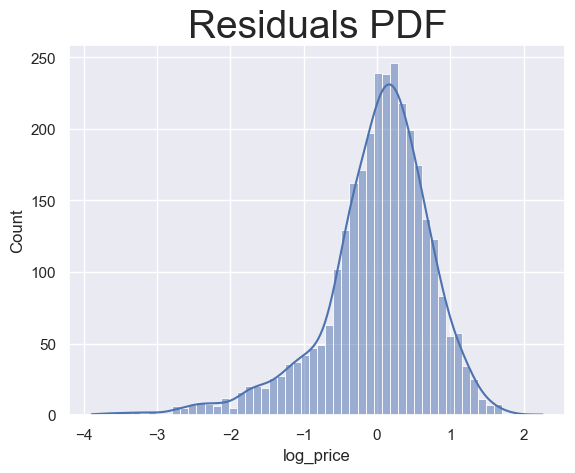

In [78]:
sns.histplot(y_train - y_hat, kde=True)
plt.title('Residuals PDF', size=28)

In [79]:
reg.score(x_train, y_train)

0.6453760625809726

## Finding weights and bias

In [80]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.776410
1,EngineV,0.326770
2,Brand_BMW,0.016359
3,Brand_Mercedes-Benz,0.056562
4,Brand_Mitsubishi,-0.175650
5,Brand_Renault,-0.206093
6,Brand_Toyota,-0.047812
7,Brand_Volkswagen,-0.083226
8,Body_hatch,-0.227991
9,Body_other,-0.137377


## Testing

In [81]:
y_hat_test = reg.predict(x_test)

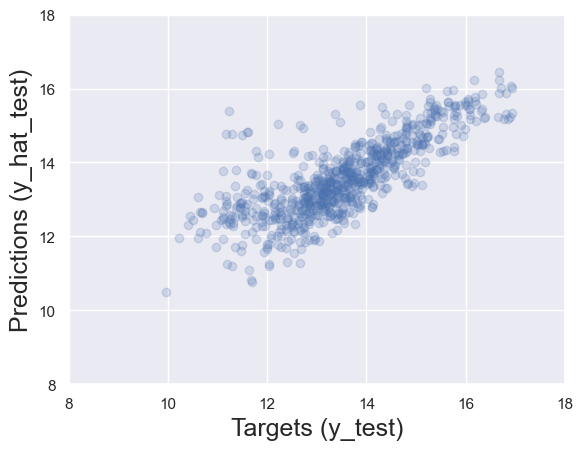

In [85]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(8,18)
plt.ylim(8,18)
plt.show()

In [89]:
df_pf = pd.DataFrame(data=np.exp(y_hat_test), columns = ['Predictions'])
df_pf.head()

,Predictions
0,$4500708.505386428
1,$420447.3697469049
2,$909486.1719107174
3,$615062.7740257074
4,$252072.6343041785


In [94]:
pd.options.display.float_format = '{:,.2f}'.format

y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Predictions,Target,Difference,Difference %
0,"4,500,708.51","1,756,029.43","2,744,679.08",0.39
1,"420,447.37","498,615.04","-78,167.67",1.19
2,"909,486.17","116,567.29","792,918.88",0.13
3,"615,062.77","767,387.21","-152,324.43",1.25
4,"252,072.63","242,496.78","9,575.86",0.96


In [102]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']
df_pf['Difference %'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Difference %
0,"4,500,708.51","1,756,029.43","-2,744,679.08",156.30
1,"420,447.37","498,615.04","78,167.67",15.68
2,"909,486.17","116,567.29","-792,918.88",680.22
3,"615,062.77","767,387.21","152,324.43",19.85
4,"252,072.63","242,496.78","-9,575.86",3.95
...,...,...,...,...
769,"552,122.02","168,750.00","-383,372.02",227.18
770,"512,829.48","490,552.61","-22,276.88",4.54
771,"184,179.30","207,683.18","23,503.88",11.32
772,"1,509,533.30","2,472,330.50","962,797.20",38.94


In [103]:
df_pf.describe()

,Predictions,Target,Residual,Difference %
count,774.00,774.00,774.00,774.00
mean,"1,345,621.52","1,770,696.55","425,075.03",108.33
std,"1,699,569.98","3,158,545.50","2,112,105.57",349.51
min,"36,650.93","21,254.86","-4,905,219.78",0.13
25%,"374,240.20","331,023.74","-206,929.10",18.58
50%,"683,335.80","681,304.95","30,523.09",38.97
75%,"1,565,330.80","1,658,753.97","392,351.45",66.47
max,"14,036,532.79","22,557,283.60","17,995,459.84","6,263.30"


In [104]:
df_pf.sort_values(by=['Difference %'])

,Predictions,Target,Residual,Difference %
399,"540,202.07","539,525.35",-676.73,0.13
169,"331,876.56","331,023.74",-852.82,0.26
224,"661,964.19","659,174.58","-2,789.62",0.42
122,"559,422.50","556,080.53","-3,341.97",0.60
149,"1,230,477.98","1,220,754.16","-9,723.82",0.80
...,...,...,...,...
585,"2,762,044.81","108,885.54","-2,653,159.27","2,436.65"
219,"2,546,007.25","98,897.30","-2,447,109.95","2,474.40"
339,"2,620,038.29","79,834.61","-2,540,203.68","3,181.83"
58,"2,582,482.36","70,786.12","-2,511,696.24","3,548.29"
